# Exploration

Jessica McGraw
Stephanie Reeder
Morgan Wood


Data Exploration:

We have looked at the head and shape of the data.  We looked at the information and data types of each variable.  We examined the data to determine if there are any null values, and found none.  We have created plots for the categorical data thus far.

Transforming Variables:

We are creating dummy codes for certain variables, such as medication, admission type, gender, race, etc. to be able to better analyze how the variables determine whether a patient was readmitted.  We changed categorical variables with integer data types to string data type.

Algorithm to Use:

Based on our research, we have discovered that decision trees, random forests, or ensemble trees will work best with our data.  We will test each and use the one with the best performance.

New Variables:

We created a new variable to document the total number of times a patient appears in the data.  This will help us see how many times a patient was admitted to determine how that impacts the likelihood of readmittance.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [2]:
db=pd.read_csv("C:\\Users\\morga\\Desktop\\diabetic_data_filter2.csv", 
               dtype= {'admission_type_id':'object'
                        ,'discharge_disposition_id':'object'                
                        ,'diag_1':'object'
                        ,'diag_2':'object'
                        ,'diag_3':'object'
                        ,'admission_source_id':'object'
                        ,'patient_nbr':'object'})

In [3]:
db.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit2
0,67718568,8767800,Caucasian,Male,[70-80),1,13,7,5,58,...,No,No,No,No,No,No,No,Yes,<30,YES
1,79272192,18941193,Caucasian,Female,[80-90),1,13,7,8,33,...,No,No,No,No,No,No,No,No,<30,YES
2,116181156,93854601,Caucasian,Male,[80-90),1,13,7,2,59,...,No,No,No,No,No,No,No,No,<30,YES
3,142183272,23192208,AfricanAmerican,Female,[40-50),1,13,7,7,36,...,No,No,No,No,No,No,No,No,<30,YES
4,151466112,66776904,Caucasian,Female,[70-80),1,13,7,3,41,...,No,No,No,No,No,No,No,Yes,<30,YES


In [4]:
db.shape

(65535, 48)

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 48 columns):
encounter_id                65535 non-null int64
patient_nbr                 65535 non-null object
race                        65535 non-null object
gender                      65535 non-null object
age                         65535 non-null object
admission_type_id           65535 non-null object
discharge_disposition_id    65535 non-null object
admission_source_id         65535 non-null object
time_in_hospital            65535 non-null int64
num_lab_procedures          65535 non-null int64
num_procedures              65535 non-null int64
num_medications             65535 non-null int64
number_outpatient           65535 non-null int64
number_emergency            65535 non-null int64
number_inpatient            65535 non-null int64
diag_1                      65535 non-null object
diag_2                      65535 non-null object
diag_3                      65535 non-null object

In [6]:
db.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmit2'],
      dtype='object')

In [7]:
categorical_col = ['race', 'gender', 'age',  'admission_type_id', 'discharge_disposition_id', 
                   'admission_source_id','diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       #'readmit2'
                  ]


In [8]:
continous_col=[  'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient','number_diagnoses']

In [9]:
db.dtypes

encounter_id                 int64
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

We identify that not much memory was required for this dataset. Therefore, we will leave the data types as they are for current purposes.

In [10]:
db.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

This dataset does not contain any nulls. Therefore, .isnull() is not required for use.

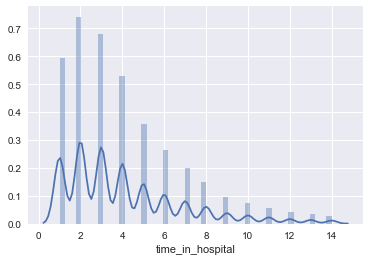

In [11]:
sns.distplot(db.time_in_hospital)

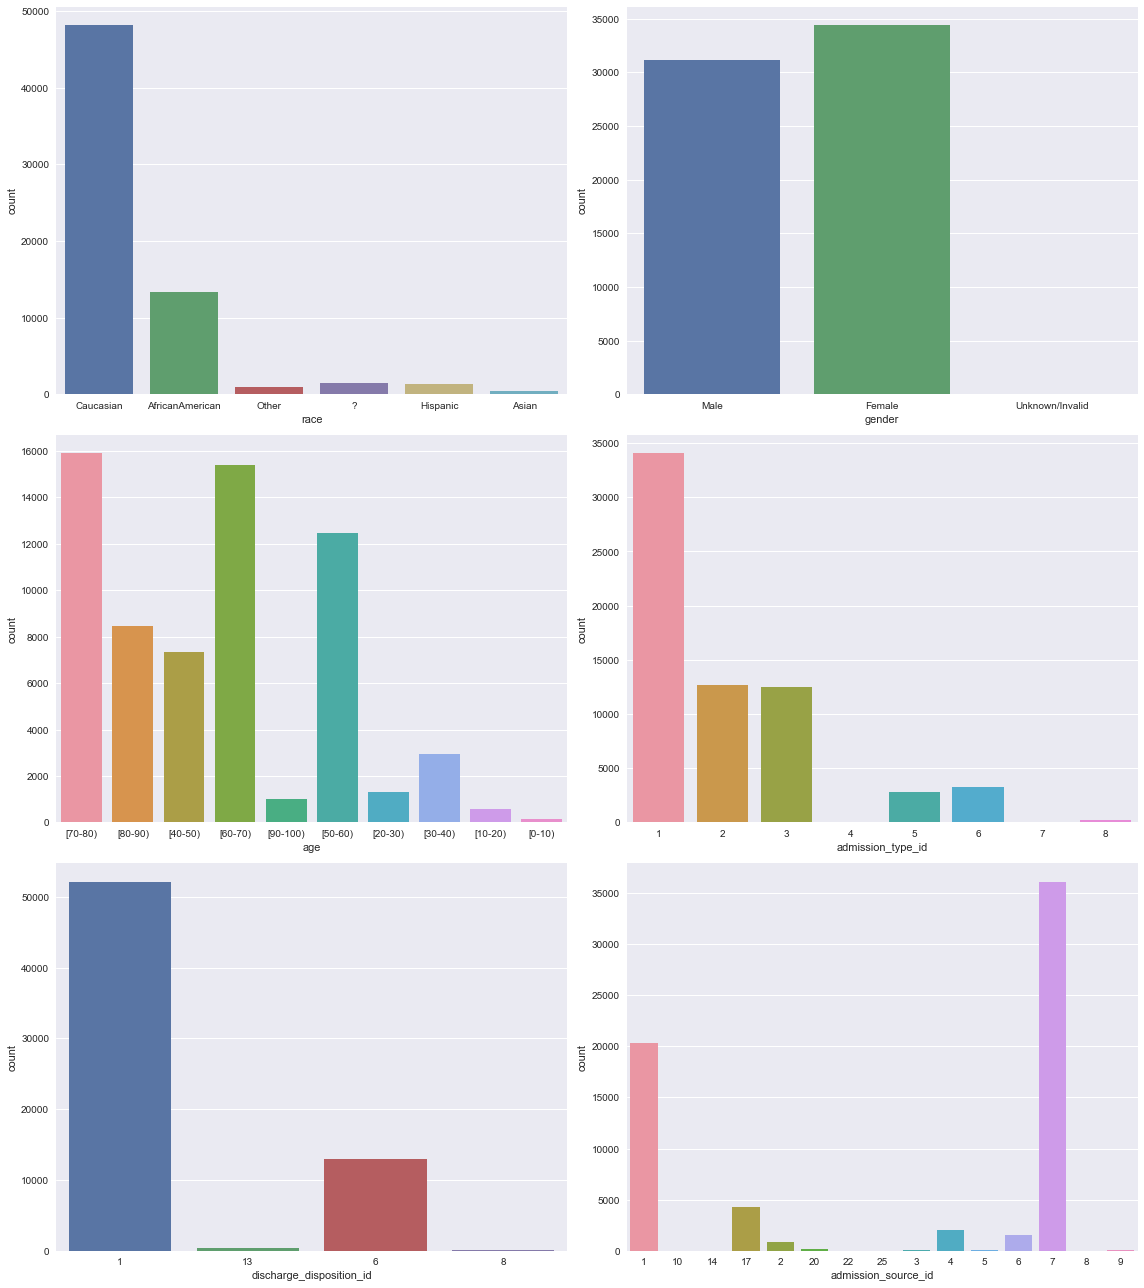

In [12]:
fig, axs = plt.subplots(3, 2, figsize = (16,18))
axslist=[ax for y in axs for ax in y]
for i in range(6):
    sns.countplot(db[categorical_col[i]],ax=axslist[i])
fig.tight_layout()    

In [13]:
db['readmit2'].value_counts()

YES    34227
NO     31308
Name: readmit2, dtype: int64

## Potentially, we have two labels to use.

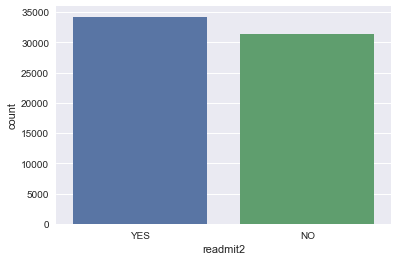

In [14]:
sns.countplot(db.readmit2)

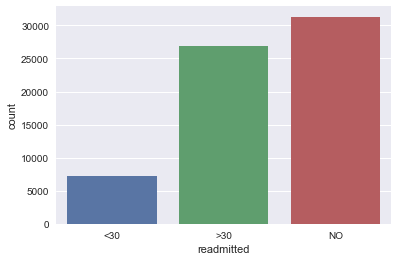

In [15]:
sns.countplot(db.readmitted)

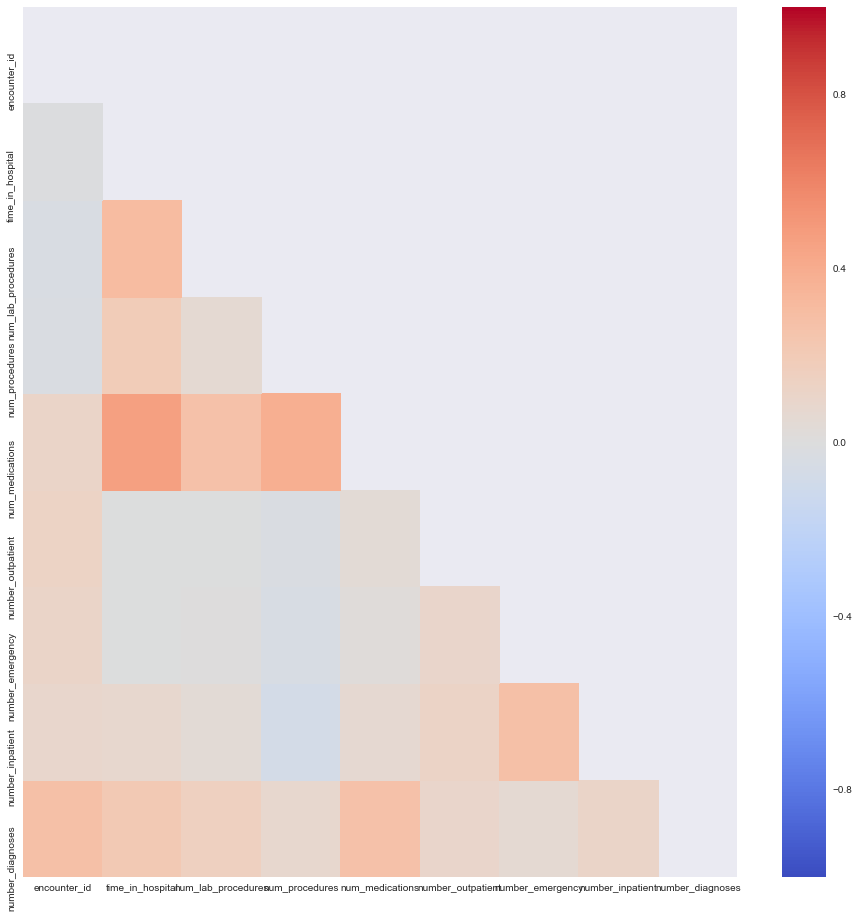

In [16]:
# Calculate correlations of numberical columns in the dataframe
corr = db.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(corr)] = True
#corr=np.triu(corr,k=1) 
# Heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr,cmap = "coolwarm",mask=mask)

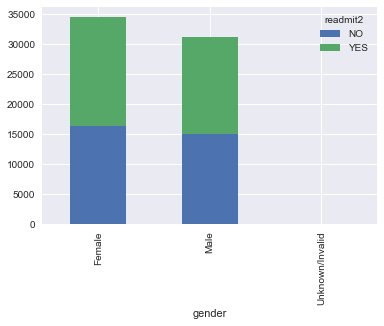

In [17]:
#Gender
db['gender']=db['gender'].fillna('Not disclosed') #fill missing with 'not disclosed'
gender_crosstab=pd.crosstab(db['gender'],db['readmit2'])# get cross table
gender_crosstab.plot(kind='bar', stacked=True, grid=True)# plot cross table 
gender_crosstab["Ratio"] =  gender_crosstab[gender_crosstab.columns[1]]/ (gender_crosstab[gender_crosstab.columns[0]]+gender_crosstab[gender_crosstab.columns[1]])#calculate the churn ratio
# gender_crosstab

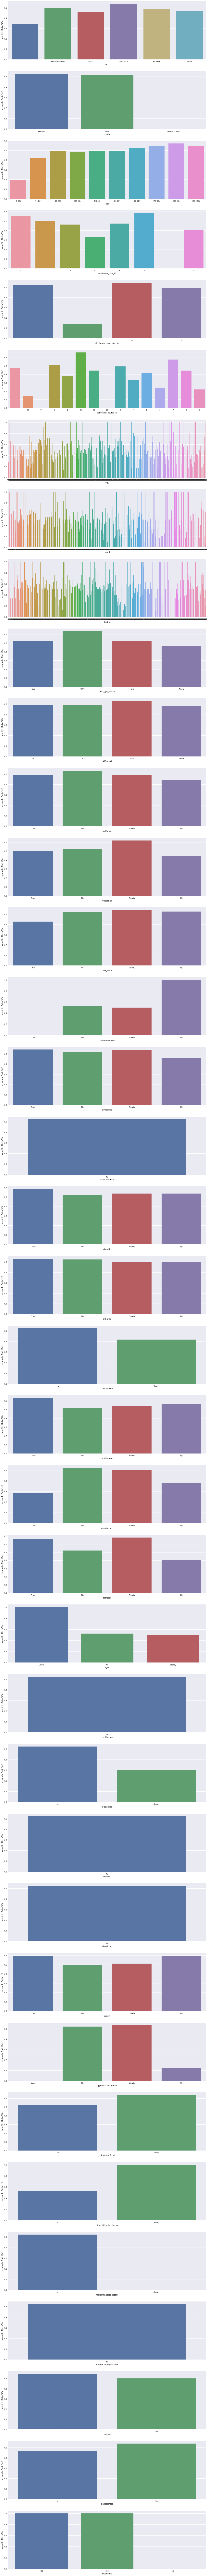

In [18]:
fig,axes=plt.subplots(len(categorical_col),1,figsize =(18,240))
#axslist=[ax for y in axes for ax in y]
for i in range(len(categorical_col)):    
    db[categorical_col[i]]=db[categorical_col[i]].fillna('Missing')#using 'missing' as a new value for missing values
    c_crosstab=pd.crosstab(db[categorical_col[i]],db['readmit2'])
    c_crosstab["db_Ratio(%)"] =  c_crosstab[c_crosstab.columns[1]] / (c_crosstab[c_crosstab.columns[0]]+c_crosstab[c_crosstab.columns[1]])
    sns.barplot(c_crosstab.index,c_crosstab["db_Ratio(%)"],ax=axes[i])


In [23]:
#New column: Number readmitted in dataset
num_hospital = db.groupby('patient_nbr').count()["encounter_id"]



In [27]:
num_hospital.shape

Index(['100000170', '100002006', '100002582', '100006182', '100006317',
       '100008315', '10001088', '100016433', '100018278', '10002096',
       ...
       '99978417', '99979560', '99980946', '99984429', '99985500', '99986328',
       '99988533', '99998208', '99998280', '99999630'],
      dtype='object', name='patient_nbr', length=48761)

In [25]:
num_hospital.head()
num_hospital[num_hospital>1]

patient_nbr
100016433    2
100018278    2
100021914    2
100022508    4
100041714    2
100111914    4
100130454    2
100143639    4
100170207    4
100193472    2
1002204      3
100231245    4
100232856    3
100238256    2
100283283    2
100287531    6
100287900    2
100303209    3
100303542    2
100313514    2
100322946    3
100331406    2
100340703    3
100344483    2
1003473      3
100378215    2
100403415    2
100410759    2
100411497    2
100415799    2
            ..
99730422     4
99730683     3
99766827     3
99768438     2
99774486     2
99777834     2
99783549     3
99795159     2
99801477     3
99811971     5
99813330     2
99823302     2
99834417     2
99834642     2
99838980     3
99862083     2
99870984     3
99872181     2
99880425     3
99902052     2
99912969     2
99914886     2
999234       2
99930375     2
99938277     2
99938439     2
99944910     3
99970974     4
99978417     2
99986328     2
Name: encounter_id, Length: 9722, dtype: int64

In [ ]:
# def reapply (x):
#     print (num_hospital[x.index])
# #     return num_hospital[x.index]
    


# db["num_readmit"]= db.apply(reapply, axis = 1)

db["num_readmit"]=1
for x in num_hospital.index:
    db[db["patient_nbr"]==x]["num_readmit"]=num_hospital[x]

C:\Users\morga\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
print (db["num_readmit"])